In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import keras

# We can load the MNIST dataset from skLearn
mnist = load_digits()
X = mnist.images
y = mnist.target

# We first check how many samples we have and their dimensionality
print(X.shape, y.shape)

Using TensorFlow backend.


(1797, 8, 8) (1797,)


1


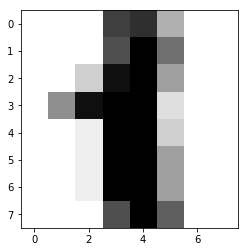

2


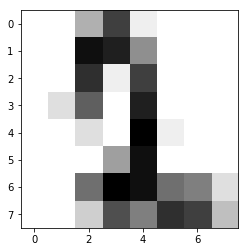

8


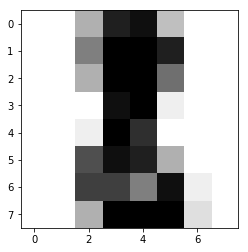

2


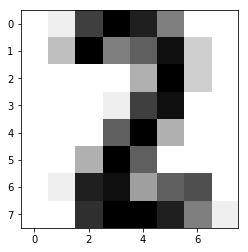

In [2]:
# We can check some of the images to verify their consistency with the labels
for i in [1,12,123,1234]:
    print(y[i])
    plt.imshow(X[i],cmap='binary')
    plt.show()

In [3]:
# Convolution2D in Keras requires us to reshape the input vector
# We have to specify that one colour channel is used
X = X.reshape((1797, 8, 8, 1))
print(X.shape)

# We also convert the target labels to categorical matrices
y = keras.utils.to_categorical(y,10)

# We can then split the dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(1797, 8, 8, 1)


In [4]:
# We can now build a CNN with a ReLU activation function Dropout layer to classify the images according to their labels
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.utils import to_categorical

cnn = Sequential()
cnn.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu', # The ReLU
                 input_shape=(8, 8, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.2)) # The Dropout layer
cnn.add(Flatten())
cnn.add(Dense(10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, batch_size=100, epochs=10, verbose=1, validation_split=0.1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1293 samples, validate on 144 samples
Epoch 1/10
1293/1293 [==============================] - 1s 726us/step - loss: 3.7385 - accuracy: 0.1106 - val_loss: 1.9490 - val_accuracy: 0.2986
Epoch 2/10
1293/1293 [==============================] - 0s 182us/step - loss: 2.1034 - accuracy: 0.3225 - val_loss: 1.2284 - val_accuracy: 0.7083
Epoch 3/10
1293/1293 [==============================] - 0s 200us/step - loss: 1.2838 - accuracy: 0.5615 - val_loss: 0.6302 - val_accuracy: 0.9167
Epoch 4/10
1293/1293 [==============================] - 0s 165us/step - loss: 0.8262 - accuracy: 0.7486 - val_loss: 0.4311 - val_accuracy: 0.9375
Epoch 5/10
1293/1293 [==============================] - 0s 196us/step - loss: 0.5998 - accuracy: 0.8268 - val_loss: 0.3340 - val_accuracy: 0.9444
Epoch 6/10
1293/1293 [==============================] - 0s 196us/step - loss: 0.4569 - accuracy: 0.8677

In [5]:
# We can now evaluate the CNN we built, by using the test data we had previously set aside
result = cnn.evaluate(X_test, y_test)
print(f'Log-loss: {result[0]}\nAccuracy: {result[1]}')

360/360 [==============================] - 0s 139us/step
Log-loss: 0.13978965514236028
Accuracy: 0.9694444537162781
